# Data analyzing of the 360-degree videos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
import glob
from datetime import datetime
import time

In [2]:
# Configure panda to show all columns
pd.set_option('display.max_columns', None)

### Merging all the traces found

In [3]:
path = './traces' # use your path
all_files = glob.glob(path + "/*.json")

li = []

for filename in all_files:
    df = pd.read_json(filename)
    li.append(df)

frame = pd.concat(li, ignore_index=True)

In [4]:
# Convert upload date (yyymmdd) to "days since upload"

current_time = datetime.now().timestamp()

for i in frame.index:
    try:
        upload_time = datetime.strptime(str(frame['upload_date'][i]), '%Y%m%d').timestamp()
        ms_since_upload = current_time - upload_time
        days_since_upload = ms_since_upload / 86400
        
        frame['upload_date'][i] =  days_since_upload
    except:
        pass

<ipython-input-4-262d4e5fef3c>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['upload_date'][i] =  days_since_upload


### Inspect data

In [5]:
frame.head(2)

,id,uploader,uploader_id,uploader_url,channel_id,channel_url,upload_date,license,creator,title,alt_title,thumbnails,description,categories,tags,subtitles,automatic_captions,duration,age_limit,annotations,chapters,webpage_url,view_count,like_count,dislike_count,average_rating,formats,is_live,start_time,end_time,series,season_number,episode_number,track,artist,album,release_date,release_year,extractor,webpage_url_basename,extractor_key,playlist,playlist_index,thumbnail,display_id,requested_subtitles,requested_formats,format,format_id,width,height,resolution,fps,vcodec,vbr,stretched_ratio,acodec,abr,ext,fulltitle,_filename,format_note,preference,url,manifest_url,tbr,protocol,player_url,http_headers
0,j_mpPi3oRMw,TycerVR 360 Videos,TycerX,http://www.youtube.com/user/TycerX,UC6AhuKHE0b2SdAnPUFpmFJQ,http://www.youtube.com/channel/UC6AhuKHE0b2SdA...,164,NaN,NaN,You're ESCAPING SIREN HEAD in 360/VR - Horror ...,NaN,[{'url': 'https://i.ytimg.com/vi/j_mpPi3oRMw/h...,"You're ESCAPING SIREN HEAD, in 360/VR! You've ...",[Gaming],"[siren head 360, sirenhead 360, 360 degree sir...",{},{},444,0,NaN,NaN,https://www.youtube.com/watch?v=j_mpPi3oRMw,2739153,25246.0,2885.0,4.589777,"[{'format_id': '249', 'url': 'https://r3---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi/j_mpPi3oRMw/maxresdefau...,j_mpPi3oRMw,NaN,"[{'format_id': '305', 'url': 'https://r3---sn-...",305 - 3840x1920 (2160s60)+251 - audio only (tiny),305+251,3840,1920,NaN,60,avc1.640034,NaN,NaN,opus,160.0,mp4,You're ESCAPING SIREN HEAD in 360/VR - Horror ...,You're ESCAPING SIREN HEAD in 360_VR - Horror ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,uBn7je492Ek,360 Vacation VR,UCOjj3ULJrkHBYDLHhti5K-w,http://www.youtube.com/channel/UCOjj3ULJrkHBYD...,UCOjj3ULJrkHBYDLHhti5K-w,http://www.youtube.com/channel/UCOjj3ULJrkHBYD...,146,NaN,NaN,🟩 360 video Dinosaur Google Chrome Dino Run Br...,NaN,[{'url': 'https://i.ytimg.com/vi/uBn7je492Ek/h...,Dino Jump & Run Run of Google Chrome Browser G...,[Gaming],"[vr, 360, 3d, dino 3d, dino, virtual reality, ...",{},{},141,0,NaN,NaN,https://www.youtube.com/watch?v=uBn7je492Ek,1645916,11174.0,1763.0,4.454897,"[{'format_id': '249', 'url': 'https://r4---sn-...",NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,youtube,watch,Youtube,NaN,NaN,https://i.ytimg.com/vi_webp/uBn7je492Ek/maxres...,uBn7je492Ek,NaN,"[{'format_id': '266', 'url': 'https://r4---sn-...",266 - 3840x2160 (2160s)+251 - audio only (tiny),266+251,3840,2160,NaN,30,avc1.640033,NaN,NaN,opus,160.0,mp4,🟩 360 video Dinosaur Google Chrome Dino Run Br...,🟩 360 video Dinosaur Google Chrome Dino Run Br...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
len(frame.id.unique())

1685

In [7]:
frame.describe()

,upload_date,duration,age_limit,annotations,view_count,like_count,dislike_count,average_rating,is_live,series,season_number,episode_number,release_date,release_year,playlist,playlist_index,requested_subtitles,width,height,resolution,fps,vbr,stretched_ratio,abr,preference,tbr,player_url
count,2333.000000,2333.000000,2333.000000,0.0,2.333000e+03,2.243000e+03,2032.000000,2299.000000,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2333.000000,2333.000000,0.0,2333.000000,0.0,0.0,2216.000000,0.0,3.000000,0.0
mean,691.507501,336.213030,0.077154,NaN,5.768300e+06,4.443042e+04,5689.959154,4.581046,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3629.117017,1954.700386,NaN,35.994428,NaN,NaN,152.361011,NaN,4510.555000,NaN
std,650.567460,1062.744342,1.176185,NaN,1.414277e+07,1.018644e+05,18749.605167,0.412722,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,974.258570,574.752140,NaN,13.221898,NaN,NaN,14.045383,NaN,355.515553,NaN
min,7.000000,0.000000,0.000000,NaN,1.000000e+00,2.000000e+00,2.000000,1.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480.000000,480.000000,NaN,10.000000,NaN,NaN,128.000000,NaN,4100.041000,NaN
25%,83.000000,120.000000,0.000000,NaN,1.218600e+04,1.140000e+02,35.000000,4.433418,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,1920.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4407.926500,NaN
50%,465.000000,190.000000,0.000000,NaN,4.059380e+05,4.736000e+03,606.000000,4.647059,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,2048.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4715.812000,NaN
75%,1271.000000,325.000000,0.000000,NaN,5.545099e+06,4.413100e+04,5529.000000,4.840413,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3840.000000,2160.000000,NaN,30.000000,NaN,NaN,160.000000,NaN,4715.812000,NaN
max,2104.000000,42900.000000,18.000000,NaN,2.155207e+08,1.137600e+06,634827.000000,5.000000,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8640.000000,8192.000000,NaN,60.000000,NaN,NaN,256.000000,NaN,4715.812000,NaN


In [8]:
print(df.columns.tolist())

['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id', 'channel_url', 'upload_date', 'license', 'creator', 'title', 'alt_title', 'thumbnails', 'description', 'categories', 'tags', 'subtitles', 'automatic_captions', 'duration', 'age_limit', 'annotations', 'chapters', 'webpage_url', 'view_count', 'like_count', 'dislike_count', 'average_rating', 'formats', 'is_live', 'start_time', 'end_time', 'series', 'season_number', 'episode_number', 'track', 'artist', 'album', 'release_date', 'release_year', 'extractor', 'webpage_url_basename', 'extractor_key', 'playlist', 'playlist_index', 'thumbnail', 'display_id', 'requested_subtitles', 'requested_formats', 'format', 'format_id', 'width', 'height', 'resolution', 'fps', 'vcodec', 'vbr', 'stretched_ratio', 'acodec', 'abr', 'ext', 'fulltitle', '_filename']


In [9]:
len(frame['categories'].apply(sorted).transform(tuple).unique())

15

In [10]:
categories = pd.DataFrame(frame['categories'].apply(sorted).transform(tuple).unique())

In [11]:
categories

,0
0,"(Gaming,)"
1,"(Film & Animation,)"
2,"(People & Blogs,)"
3,"(Entertainment,)"
4,"(Music,)"
5,"(Travel & Events,)"
6,"(Pets & Animals,)"
7,"(Autos & Vehicles,)"
8,"(Sports,)"
9,"(Education,)"


In [12]:
grouped = frame.groupby("categories")

In [13]:
newFrame = frame['categories'].apply(sorted).transform(tuple)

In [14]:
frame["tupleCat"] = newFrame

In [15]:
frame["tupleCat"]

0                     (Gaming,)
1                     (Gaming,)
2           (Film & Animation,)
3                     (Gaming,)
4                     (Gaming,)
                 ...           
2328               (Education,)
2329        (Film & Animation,)
2330    (Science & Technology,)
2331                  (Gaming,)
2332           (Entertainment,)
Name: tupleCat, Length: 2333, dtype: object

In [16]:
frame.groupby("tupleCat").agg("count")["id"]

tupleCat
(Autos & Vehicles,)          69
(Comedy,)                    13
(Education,)                 61
(Entertainment,)            397
(Film & Animation,)         260
(Gaming,)                   762
(Howto & Style,)             12
(Music,)                     88
(News & Politics,)           29
(Nonprofits & Activism,)      8
(People & Blogs,)           198
(Pets & Animals,)            21
(Science & Technology,)      86
(Sports,)                   112
(Travel & Events,)          217
Name: id, dtype: int64

## Plotting relations between categories and other characteristics

### Upload date

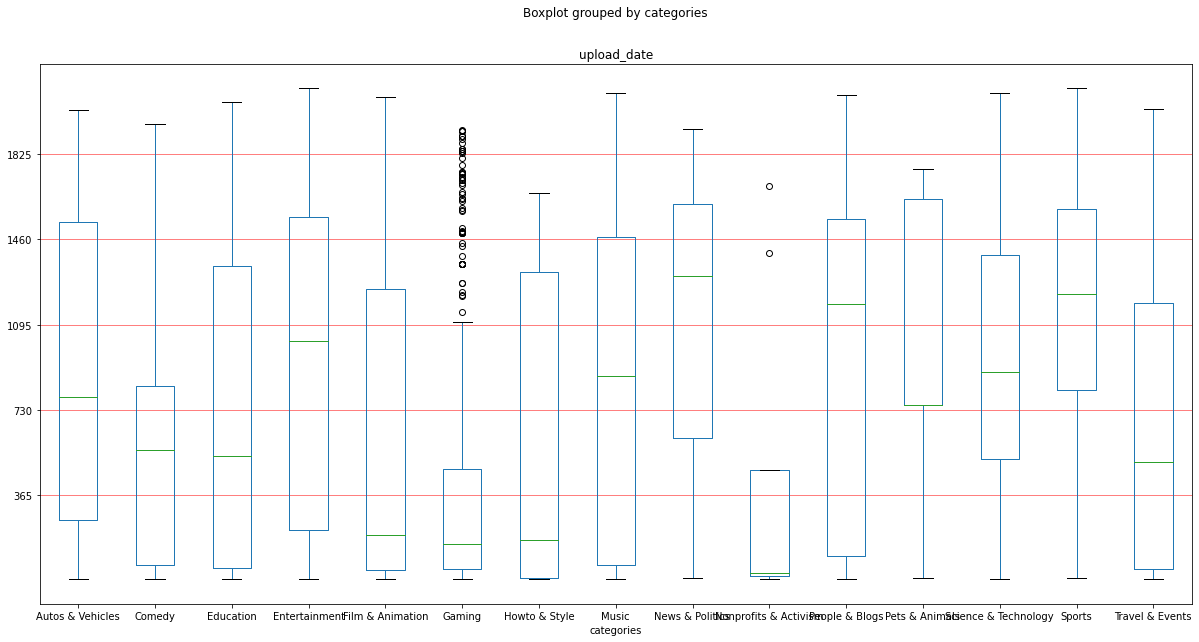

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['upload_date'], ax=ax, grid=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.get_yaxis().set_ticks([365, 730, 1095, 1460, 1825])

### Popularity

#### Plot popularity

Note: like/dislike ratio is not being used for calculating the popularity of a video (see paragraph under graphs).

In [18]:
# For each entry, calculate its popularity
frame['popularity'] = 0.0 # initial float value
frame['like_dislike_ratio'] = 0.0

for i in frame.index:
    view_count = frame['view_count'][i]
    days_since_upload = frame['upload_date'][i]
    like_count = frame['like_count'][i]
    dislike_count = frame['dislike_count'][i]

    like_dislike_ratio = like_count / dislike_count

    popularity = (view_count / float(days_since_upload))# * like_dislike_ratio

    frame['like_dislike_ratio'][i] = like_dislike_ratio
    frame['popularity'][i] =  popularity

<ipython-input-18-25ff2b57a10d>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['like_dislike_ratio'][i] = like_dislike_ratio
<ipython-input-18-25ff2b57a10d>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  frame['popularity'][i] =  popularity


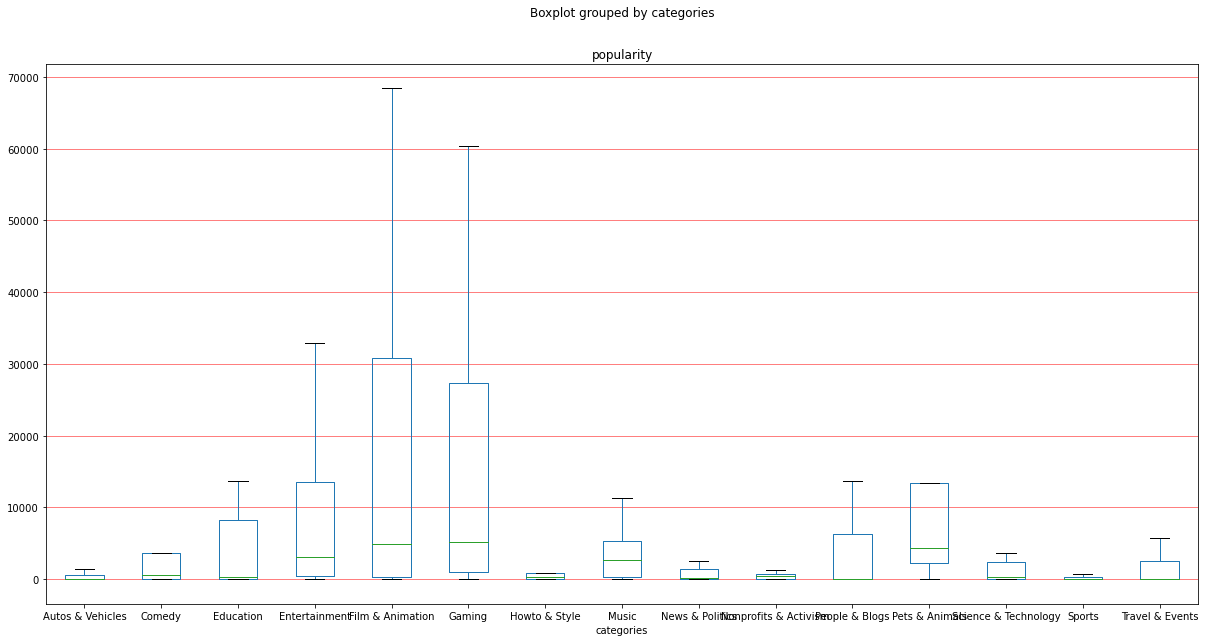

In [19]:
# Plot popularity

fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['popularity'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### Plot like/dislike ratio

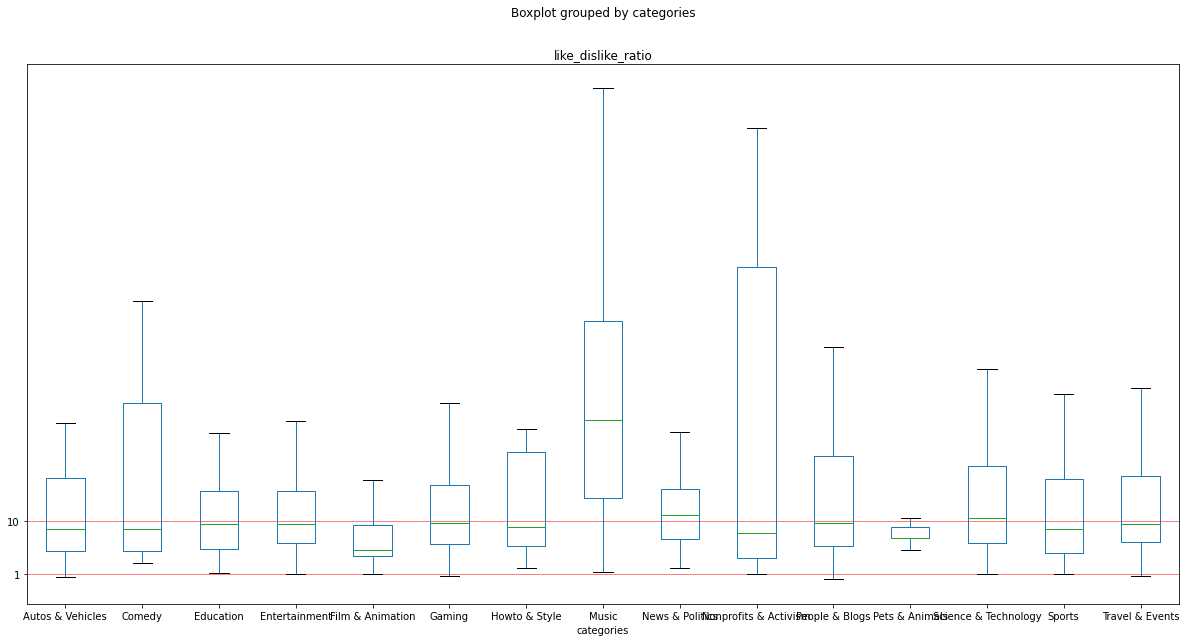

In [20]:
fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['like_dislike_ratio'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')
ax.get_yaxis().set_ticks([1, 10])

In the boxplot above, we find that the ratio between likes and dislikes on a video is hardly ever below 1. Therefore, we may conclude that viewers are more inclined to indicate which videos they like than to indicate which videos they dislike. And indeed, content creators usually encourage their audience to like their videos. Therefore, the ratio between likes and dislikes seems to be positively dominated by a relatively high number of likes.

This means that the like/dislike ratio may overrepresent the positive perception and we must be careful with using this metric.

### Available representations

## Note: we need to filter out the audio-only representations. We are only interested in representations with video (with or without audio?)

#### Number of representations

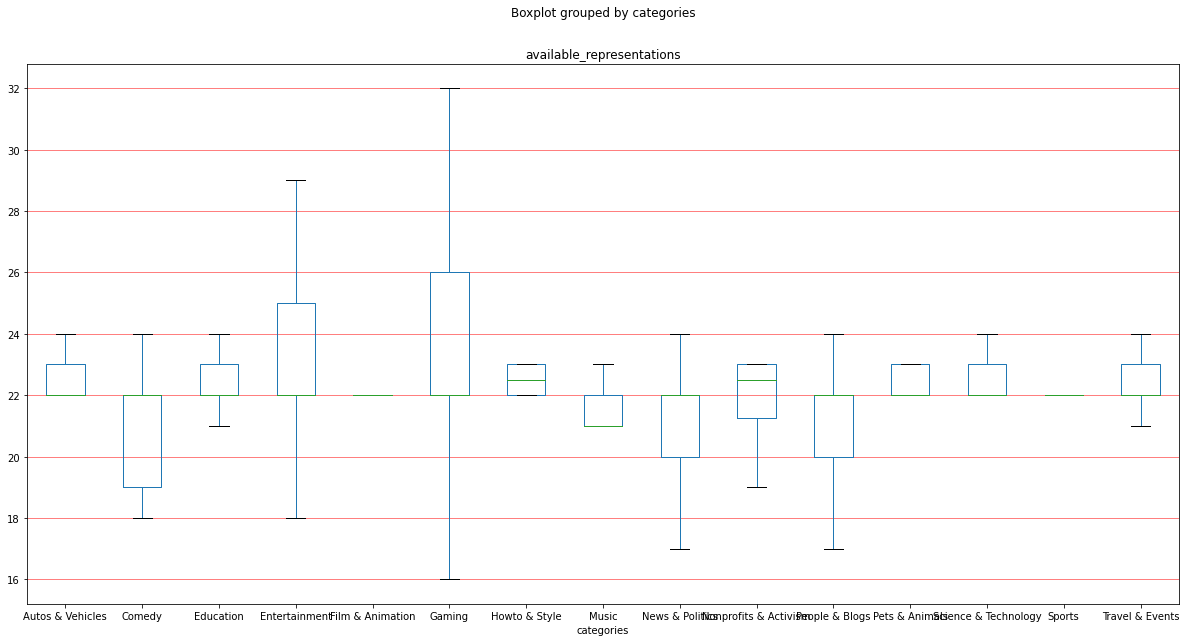

In [21]:
frame['available_representations'] = frame['formats'].str.len()

fig, ax = plt.subplots(figsize=(20, 10))
frame.explode('categories').boxplot(by='categories', column=['available_representations'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

In [22]:
df1 = (pd.concat({i: pd.DataFrame(x) for i, x in frame.pop('formats').items()})
         .reset_index(level=1, drop=True)
         .join(frame, rsuffix='_shared')
         .reset_index(drop=True))

#### Average bitrate

##### Note: this metric is incomplete; it takes into account audio-only streams as well. This pulls the median values down significantly.

In [25]:
# Create column for average bitrate (kbps)
df1['average_bitrate'] = 0.0

for i in df1.index:
    try:
        file_size_bytes = df1['filesize'][i]
        file_size_bits = file_size_bytes * 8
        
        duration = df1['duration'][i]
        
        average_bitrate = file_size_bits / float(duration) / 1000 # average bitrate in kbps
        
        df1['average_bitrate'][i] =  average_bitrate
    except:
        pass

<ipython-input-25-71f7d4633b92>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['average_bitrate'][i] =  average_bitrate


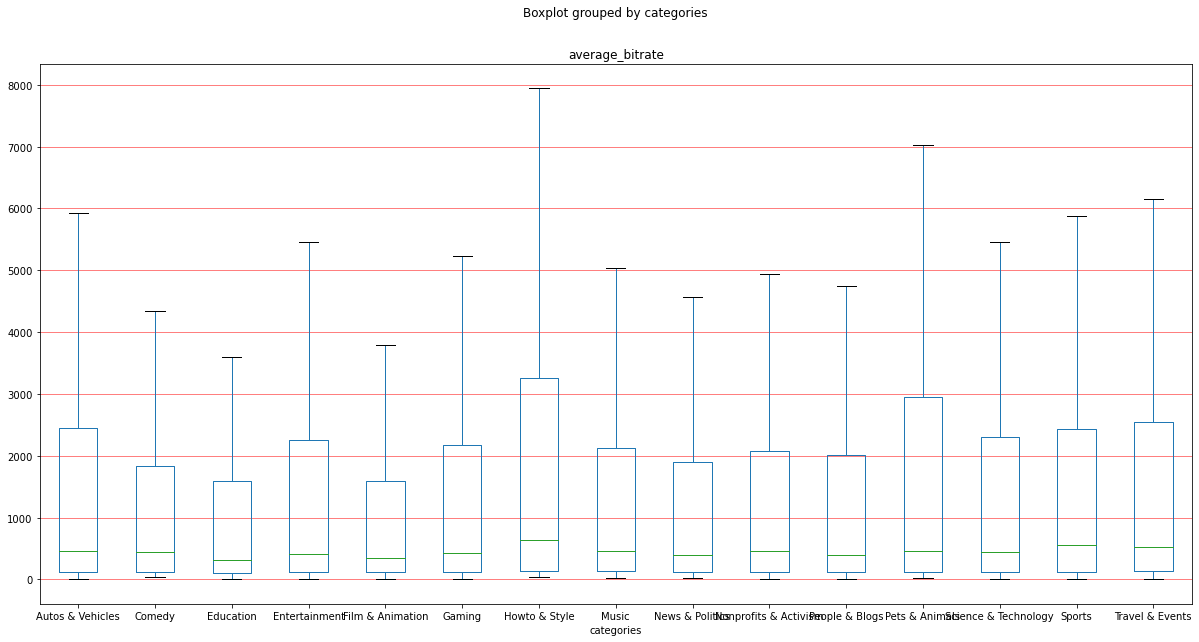

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['average_bitrate'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### File types

In [27]:
df1.groupby('categories')

In [28]:
df1.groupby('ext').agg('count')["id"]

ext
m4a      2461
mp4     23957
webm    25830
Name: id, dtype: int64

#### Framerates

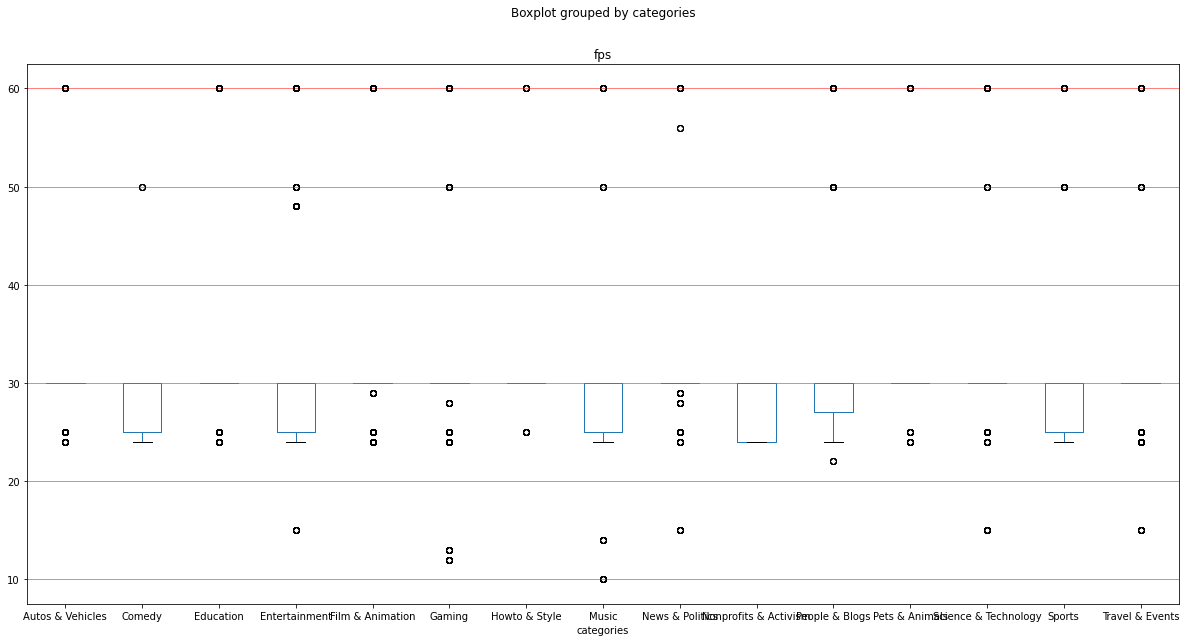

In [23]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['fps'], ax=ax, grid=False, showfliers=True)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')

#### Durations

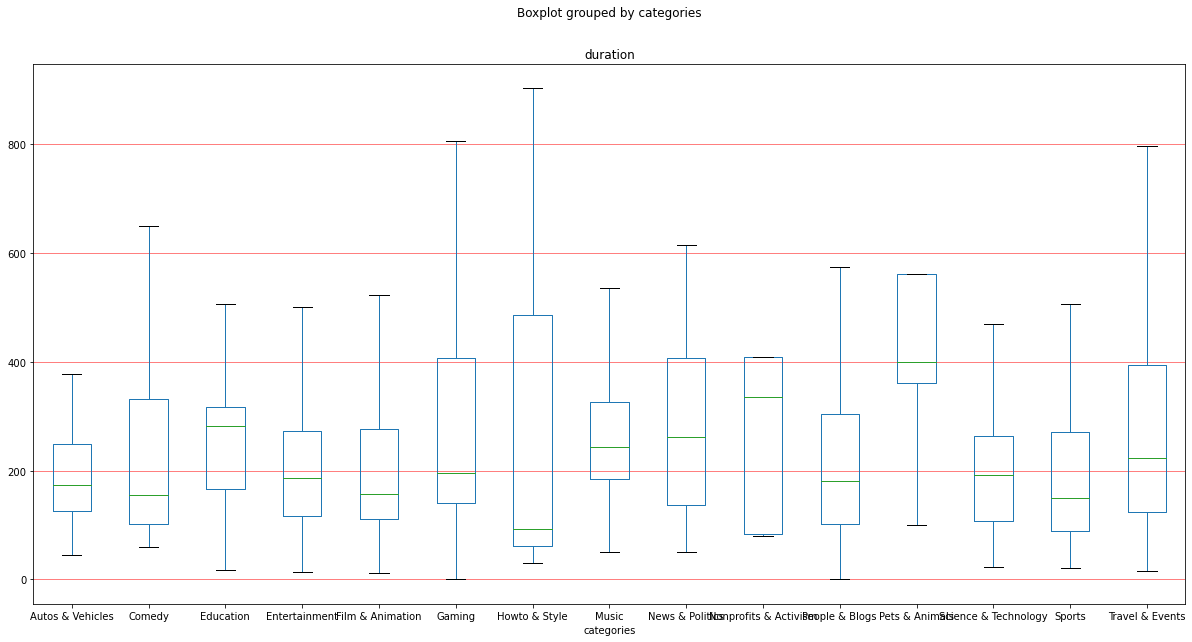

In [24]:
fig, ax = plt.subplots(figsize=(20, 10))
df1.explode('categories').boxplot(by='categories', column=['duration'], ax=ax, grid=False, showfliers=False)

ax.yaxis.grid(which='major', linestyle='-', linewidth='0.5', color='red')